# Kepler Data

### import packages

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
import statsmodels.formula.api as sm
import numpy as np
import statsmodels.stats.diagnostic as sms
from statsmodels.compat import lzip

### loading data

In [139]:
df = pd.read_csv('Kepler_Regression.csv')

### generating correlation between feature

In [140]:
corr = df.corr()

### Checking correlation

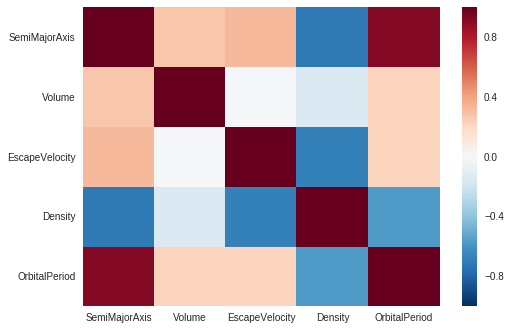

In [141]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

### Generatinga scatter matrix

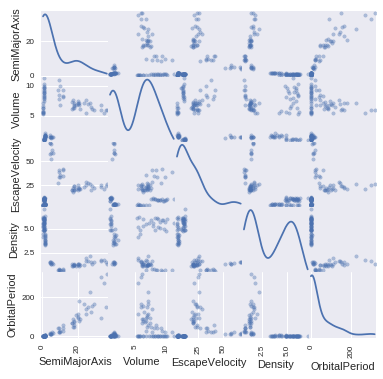

In [163]:
pd.scatter_matrix(df, alpha=0.4, figsize=(6, 6), diagonal='kde')
plt.show()

## Model1

### Dividing data into training and testing

In [164]:
X = df.loc[:,['SemiMajorAxis']]
Y = df.loc[:,['OrbitalPeriod']]

X_train = X.iloc[0:-20,:]
Y_train = Y.iloc[0:-20,:]

X_test = X.iloc[-20:,:]
Y_test = Y.iloc[-20:,:]

### Genertaing Linear Regression Model

In [165]:
regr = linear_model.LinearRegression()

### Fitting Data on the model 

In [166]:
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Coefficient value and Intercept value after fitting

In [167]:
print('Coefficients: \t', regr.coef_)
print('Intercept: \t', regr.intercept_)

Coefficients: 	 [[ 5.76758021]]
Intercept: 	 [-9.43091306]


### Calculating Mean Square, RMS, and  Variance :

In [168]:
mean = np.mean((regr.predict(X_test) - Y_test) ** 2)
rms = np.sqrt(np.mean((regr.predict(X_test) - Y_test) ** 2))
variance_score = regr.score(X_test, Y_test)

In [169]:
print("Mean squared error : %.2f"% mean)
print("Root mean squared error : %.2f"% rms)
print('Variance score: %.2f' % variance_score)

Mean squared error : 806.65
Root mean squared error : 28.40
Variance score: 0.85


### Plotting graphs for test data


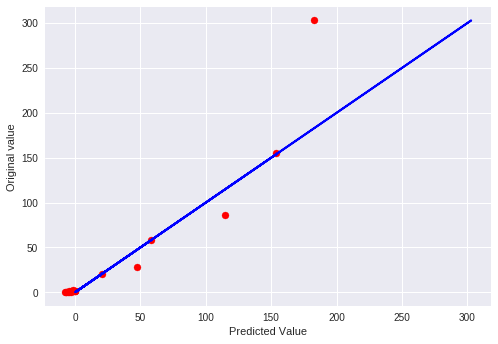

In [170]:
plt.scatter(regr.predict(X_test), Y_test,  color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Original value')
plt.plot(Y_test, Y_test, color='blue',linewidth=2)
plt.show()

## Model2

### Dividing data into training and testing

In [194]:
df_log = np.log(df.loc[:80,['SemiMajorAxis','OrbitalPeriod']])
X_log = np.log(df.loc[:,['SemiMajorAxis']])
Y_log = np.log(df.loc[:,['OrbitalPeriod']])

X_train_log = X_log.iloc[0:-20,:]
Y_train_log = Y_log.iloc[0:-20,:]

X_test_log = X_log.iloc[-20:,:]
Y_test_log = Y_log.iloc[-20:,:]

### Regression Summary

In [198]:
results = sm.ols(formula="OrbitalPeriod ~ SemiMajorAxis", data=df_log).fit()
print (results.summary()) 

                            OLS Regression Results                            
Dep. Variable:          OrbitalPeriod   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     4855.
Date:                Tue, 28 Mar 2017   Prob (F-statistic):           1.07e-72
Time:                        15:41:25   Log-Likelihood:                -15.952
No. Observations:                  81   AIC:                             35.90
Df Residuals:                      79   BIC:                             40.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0061      0.042      0.146

### Genertaing Linear Regression Model

In [172]:
regr1 = linear_model.LinearRegression()

### Fitting Data on the model 

In [173]:
regr1.fit(X_train_log,Y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Coefficient value and Intercept value after fitting

In [174]:
print('Coefficients: \t', regr1.coef_)
print('Intercept: \t', regr1.intercept_)

Coefficients: 	 [[ 1.49926441]]
Intercept: 	 [ 0.01859907]


### Calculating Mean Square, RMS, and  Variance :

In [175]:
mean = np.mean((regr1.predict(X_test_log) - Y_test_log) ** 2)
rms = np.sqrt(np.mean((regr1.predict(X_test_log) - Y_test_log) ** 2))
variance_score = regr1.score(X_test_log, Y_test_log)

In [176]:
print("Mean squared error : %.2f"% mean)
print("Root mean squared error : %.2f"% rms)
print('Variance score: %.2f' % variance_score)

Mean squared error : 0.12
Root mean squared error : 0.34
Variance score: 0.98


### Plotting graphs for test data


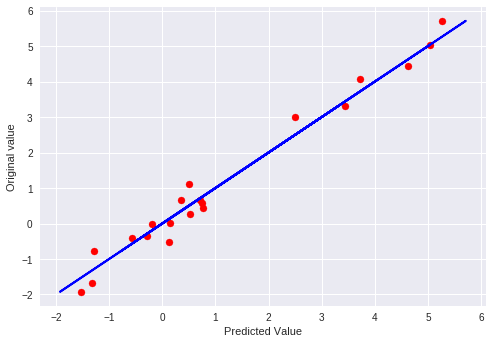

In [177]:
plt.scatter(regr1.predict(X_test_log), Y_test_log,  color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Original value')
plt.plot(Y_test_log, Y_test_log, color='blue',linewidth=2)
plt.show()

### Residual description for Model2  

### Histogram for residuals

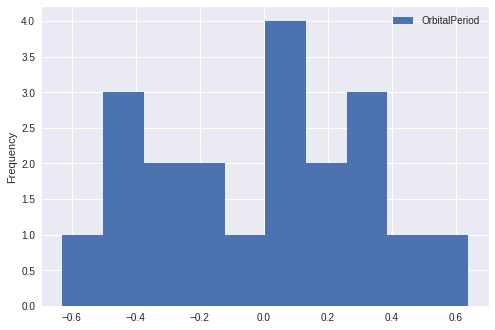

In [206]:
residuals = regr1.predict(X_test_log)- (Y_test_log)
residuals.plot(kind='hist')
plt.show()

### Box Plot for residuals

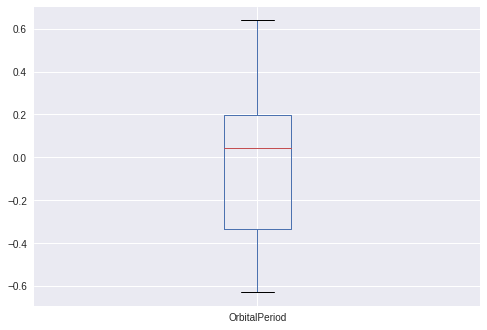

In [204]:
residuals.plot(kind='box')
plt.show()

### Regression Diagnostic

In [203]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 0.95215494436384196), ('p-value', 0.55949239534871198)]